# PSTAT 134 - Histograms and Distributions <a class='tocSkip'>
    
## Sang-Yun Oh <a class='tocSkip'> 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Random-Variables-vs.-Data" data-toc-modified-id="Random-Variables-vs.-Data-1">Random Variables vs. Data</a></span></li><li><span><a href="#Histogram-as-Probability-Functions" data-toc-modified-id="Histogram-as-Probability-Functions-2">Histogram as Probability Functions</a></span><ul class="toc-item"><li><span><a href="#Properties-of-Histograms" data-toc-modified-id="Properties-of-Histograms-2.1">Properties of Histograms</a></span></li><li><span><a href="#Estimating-Probabilities" data-toc-modified-id="Estimating-Probabilities-2.2">Estimating Probabilities</a></span></li><li><span><a href="#Checking-Probabilities" data-toc-modified-id="Checking-Probabilities-2.3">Checking Probabilities</a></span></li><li><span><a href="#Histogram-with-$n$-(nonzero)-bins" data-toc-modified-id="Histogram-with-$n$-(nonzero)-bins-2.4">Histogram with $n$ (nonzero) bins</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-2.5">Summary</a></span></li></ul></li><li><span><a href="#Resampling-from-Data" data-toc-modified-id="Resampling-from-Data-3">Resampling from Data</a></span><ul class="toc-item"><li><span><a href="#Empirical-CDF" data-toc-modified-id="Empirical-CDF-3.1">Empirical CDF</a></span></li><li><span><a href="#Method-of-Distributions" data-toc-modified-id="Method-of-Distributions-3.2">Method of Distributions</a></span></li><li><span><a href="#Bootstrap-Algorithm" data-toc-modified-id="Bootstrap-Algorithm-3.3">Bootstrap Algorithm</a></span></li><li><span><a href="#Simpler-Bootstrap-Algorithm" data-toc-modified-id="Simpler-Bootstrap-Algorithm-3.4">Simpler Bootstrap Algorithm</a></span></li></ul></li><li><span><a href="#Example:-Loaded-Dice" data-toc-modified-id="Example:-Loaded-Dice-4">Example: Loaded Dice</a></span><ul class="toc-item"><li><span><a href="#Sampling-from-Population" data-toc-modified-id="Sampling-from-Population-4.1">Sampling from Population</a></span></li><li><span><a href="#Resampling-from-Data" data-toc-modified-id="Resampling-from-Data-4.2">Resampling from Data</a></span></li><li><span><a href="#Population,-Random-Sample,-vs.-Random-Resample" data-toc-modified-id="Population,-Random-Sample,-vs.-Random-Resample-4.3">Population, Random Sample, vs. Random Resample</a></span></li><li><span><a href="#Quantifying-Uncertainty" data-toc-modified-id="Quantifying-Uncertainty-4.4">Quantifying Uncertainty</a></span></li></ul></li><li><span><a href="#Resampling-Strategies" data-toc-modified-id="Resampling-Strategies-5">Resampling Strategies</a></span></li><li><span><a href="#Bootstrap-Estimates-of-Bias,-Standard-Deviation,-and-MSE" data-toc-modified-id="Bootstrap-Estimates-of-Bias,-Standard-Deviation,-and-MSE-6">Bootstrap Estimates of Bias, Standard Deviation, and MSE</a></span><ul class="toc-item"><li><span><a href="#Bootstrap-Bias-Estimate" data-toc-modified-id="Bootstrap-Bias-Estimate-6.1">Bootstrap Bias Estimate</a></span></li><li><span><a href="#Bootstrap-Standard-Error" data-toc-modified-id="Bootstrap-Standard-Error-6.2">Bootstrap Standard Error</a></span></li><li><span><a href="#Bootstrap-Mean-Square-Error" data-toc-modified-id="Bootstrap-Mean-Square-Error-6.3">Bootstrap Mean Square Error</a></span></li></ul></li></ul></div>

# Random Variables vs. Data

**Random Variable: $Y$**
- Suppose $Y\sim f(y)$, and $f(y)$ is the **probability density function**
- $f(y)$ analytically defines behavior of $Y$
- $P(Y\in (a, b)) = \int_a^b f(y) dy$

**Data of $Y$: $y_1, y_2, \dots$**
- Each $y_i$ is one (random) observation of $Y$
- In practice, the **true distribution**, $f(y)$, is not known
- However, we can estimate the **empirical distribution**, $\hat f(y)$, from data
- Histogram $\hat f(y)$ and equivalently its CDF, $\hat F(y)$, is the empirical distribution of $Y$

### pdf vs pmf

- Probability density function (pdf), continuous random variable: $X \sim f(x)$

$$P(a \leq x \leq b) = \int_a^b f(x) dx$$
 
- Probability mass function (pmf), discrete random variable: $P(X = x_i) = p_i$

$$\sum_i p_i = 1$$

# Histogram as Probability Functions

True pdf of $N(3,1)$ looks like

In [6]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm
np.random.seed(234)

In [7]:
num_data = 100 # number of observations
num_bins = 20  # number of bins

Y = norm(loc=3, scale=1)
# analytical density function f(y) of Normal(3, 1)
def f(y): 
    return Y.pdf(y)

y_data = Y.rvs(num_data) # made up "data"
y_grid = np.linspace(-2, 8, num=1000) # choose some falues of y

In [8]:
len(y_data)

100

In [9]:
np.linspace(-2, 8, num=10)

array([-2.        , -0.88888889,  0.22222222,  1.33333333,  2.44444444,
        3.55555556,  4.66666667,  5.77777778,  6.88888889,  8.        ])

In [4]:
(8+2)/1000

0.01

In [10]:
np.linspace(-2, 8, num=num_bins+1)

array([-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,
        3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ])

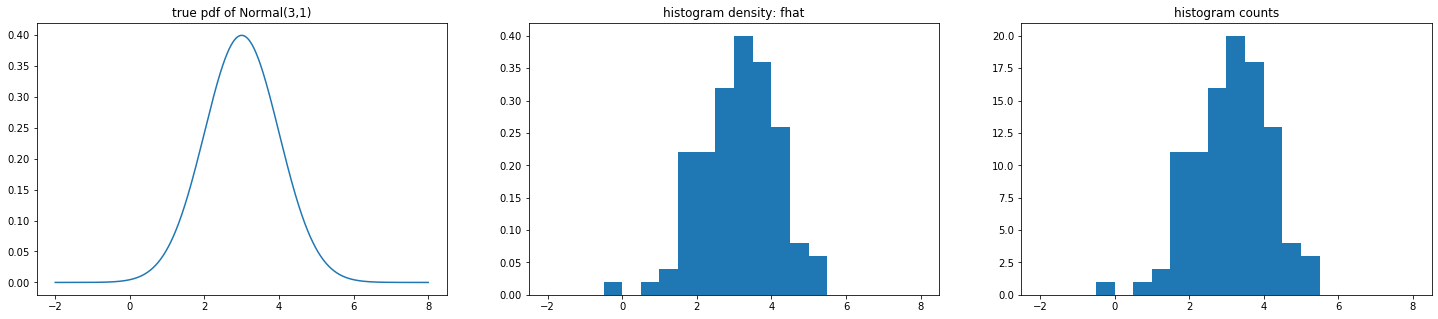

In [27]:
fig, ax = plt.subplots(1, 3, figsize=(25, 5))

ax[0].plot(y_grid, f(y_grid))

bin_edges = np.linspace(-2, 8, num=num_bins+1)
fhat,   bins, patches = ax[1].hist(y_data, density=True,  bins=bin_edges) # density plot
counts, bins, patches = ax[2].hist(y_data, density=False, bins=bin_edges) # counts plot

ax[0].set_title('true pdf of Normal(3,1)'); ax[1].set_title('histogram density: fhat'); ax[2].set_title('histogram counts')
plt.show()

In [13]:
fhat

array([0.  , 0.  , 0.  , 0.02, 0.  , 0.02, 0.04, 0.22, 0.22, 0.32, 0.4 ,
       0.36, 0.26, 0.08, 0.06, 0.  , 0.  , 0.  , 0.  , 0.  ])

In [14]:
sum(fhat) #does not equal to 1, i.e., it is not a discrete distribution

2.0

In [15]:
sum(fhat*0.5)

1.0

In [16]:
counts

array([ 0.,  0.,  0.,  1.,  0.,  1.,  2., 11., 11., 16., 20., 18., 13.,
        4.,  3.,  0.,  0.,  0.,  0.,  0.])

In [17]:
sum(counts)

100.0

## Properties of Histograms

In [18]:
assert(len(counts) == num_bins) # check there are indeed `num_bins` of counts
assert(sum(counts) == num_data) # check total counts is equal to `num_data`

In [3]:
(8 - (-2))/20 #bin width in the histogram

0.5

In [6]:
sum(fhat*0.5) #density times bin widths (0.5) adds up to 1, equivalent to integration 

1.0

$\hat f(y)$ (when `density=True`) is a piecewise constant approximation of $f(y)$

## Estimating Probabilities

- $\hat f$ approximates $f$ (continuous pdf)
- What can we compute from histogram counts and density values? 

In [20]:
normalize_fhat  = fhat/sum(fhat)          # heights1: just normalizing fhat (constant bin width)
fhat_delta      = fhat*np.diff(bin_edges) # heights2: approximating integral with constant height per bin
bin_probability = counts/sum(counts)      # heights3: probability of being in bin

In [21]:
assert(all(np.isclose(normalize_fhat, fhat_delta)))  # heights1 is equal to heights2
assert(all(np.isclose(fhat_delta, bin_probability))) # heights2 is equal to heights3

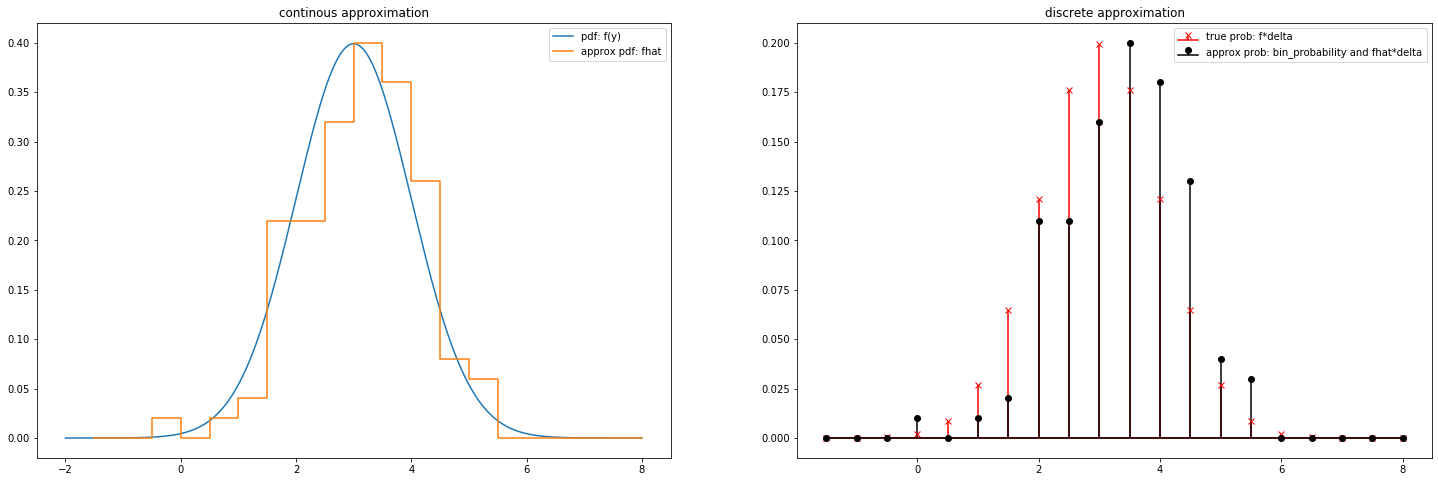

In [22]:
midpoints = bin_edges[:-1] + np.diff(bin_edges)
midpoints = bin_edges[:-1] + np.diff(bin_edges)/2

fig, ax = plt.subplots(1, 2, figsize=(25, 8))

ax[0].plot(y_grid, f(y_grid))                 # true density
ax[0].step(midpoints, fhat)                   # continuous approximation
ax[0].set_title('continous approximation')
ax[0].legend(['pdf: f(y)', 'approx pdf: fhat'])

ax[1].stem(midpoints, f(midpoints)*np.diff(bin_edges), # true probability mass at bin center
           use_line_collection=True, markerfmt='xr', linefmt='r', basefmt='r')
ax[1].stem(midpoints, bin_probability,                 # approximate probability mass at bin center 
           use_line_collection=True, markerfmt='ok', linefmt='k', basefmt='k')
ax[1].set_title('discrete approximation')
ax[1].legend(['true prob: f*delta', 'approx prob: bin_probability and fhat*delta'])

plt.show()

## Checking Probabilities

- Check if approximations are valid probabilities

In [25]:
np.isclose(sum(fhat_delta), 1)

True

- `bin_probabilities` is a pmf
    $$1 = \sum_{b=1}^B \texttt{bin-probabilities}_b = \sum_{b=1}^B \hat p(x_b)$$

## Summary

- Any distribution can be approximated with a histogram

- Approximation can be continuous or discrete

- $\hat f(y)$ is piecewise constant approximation of continuous pdf (`density=True`)

- $\hat p(y_b)$ is approximate pmf where discrete values are at bin centers 

# Resampling from Data

- Recall our data $y_i$, where $i=1,2,\dots,n$

- How can we "sample from" our empirical distribution that our data represents

- Recall from 120B definition of (theoretical) CDF:
    $$ F(y) = P(Y\leq y) = \int_{-\infty}^y f(z)\, dz $$

## Empirical CDF 

- Sort data $D$ and let order statistic of $y_i$ be $y_{(i)}$, that is, $y_{(1)} \leq y_{(2)} \leq \cdots \leq y_{(n)}$

- We can approximate $F(y)$ with $\hat F(y)$ since
    $$\begin{aligned}
     &\hat P(Y< y_{(1)}) = 0\\
     \hat F(y_{(1)}) = &\hat P(Y\leq y_{(1)}) = 1/n\\
     \hat F(y_{(2)}) = &\hat P(Y\leq y_{(2)}) = 2/n\\
     &\vdots \\         
     \hat F(y_{(n)}) = &\hat P(Y\leq y_{(n)}) = n/n = 1\\
    \end{aligned}$$

In [ ]:
def ecdf(data):
    y_ord = np.sort(data)
    n = y_ord.size
    Fhat = np.arange(1, n+1) / n
    
    return y_ord, Fhat

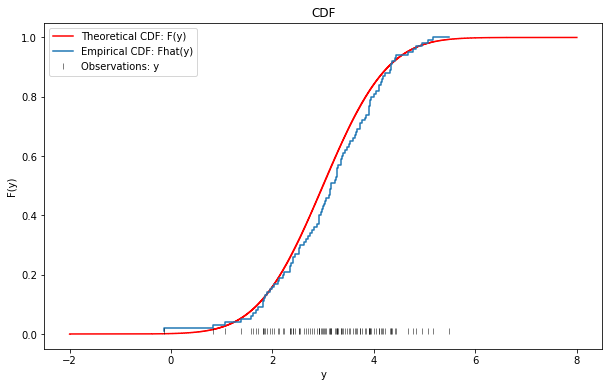

In [12]:
# y_data = Y.rvs(num_data) # new data
y_os, Fhat = ecdf(y_data)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.step(y_grid, Y.cdf(y_grid), '-r')
ax.step(y_os, Fhat, '-')
ax.plot(y_os, [0.01]*len(y_os), '|', color='k', alpha=0.5)

ax.set_title('CDF')
ax.set_xlabel('y')
ax.set_ylabel('F(y)')
ax.legend(['Theoretical CDF: F(y)', 'Empirical CDF: Fhat(y)', 'Observations: y'])
plt.show()

## How to sample data using CDF? (idea of rejection sampling)

- Knowing the pdf $f(y)$ does not mean by default we know to sample from that distribution
- Assume we know $F_Y(\cdot)$, then we can use $F_Y(\cdot)$ to draw samples!


- $Y\sim F_Y(y)$, then $U = F_Y(Y)$ has a uniform distribution
    - This is known as the "probability integral transform PIT"

- We can generate random numbers of $U\sim\text{Uniform}(0,1)$ 

- Assume $F_Y$ is invertible, by taking the inverse of $F_Y$ we have $$F^{−1}(U) = Y$$

- Now Y is sampled from the desired distribution

- In practice when $F$ is unknown, we can have $\hat F$ (revisit ECDF)

## Bootstrap Algorithm

**Simulate "new data" (bootstrap data) with one dataset: $D = \{y_1, y_2, \dots, y_n\}$?** 

Given dataset $D$ with $n$ observations,
1. For $i=1,2,\dots,n$
    1. Sample $u_i$ from Uniform(0,1)
    1. $y_i^* = \hat F^{-1}(u_i)$, 
1. Return $D^* = y^*_1, y^*_2, \dots y^*_n$

## Simpler Bootstrap Algorithm

Given dataset $D$ with $n$ observations,
1. For $i=1,2,\dots,n$
    1. Sample a random integer $i\in [1, n]$
    1. $y^*_i = y_{(i)}$
1. Return $D^* = y^*_1, y^*_2, \dots y^*_n$

![alt text](https://inferentialthinking.com/_images/Bootstrap_25_0.png)

In [13]:
def resample_ecdf(data):
    n = len(data)
    resampled_data = np.random.choice(data, len(data))
    return ecdf(resampled_data)

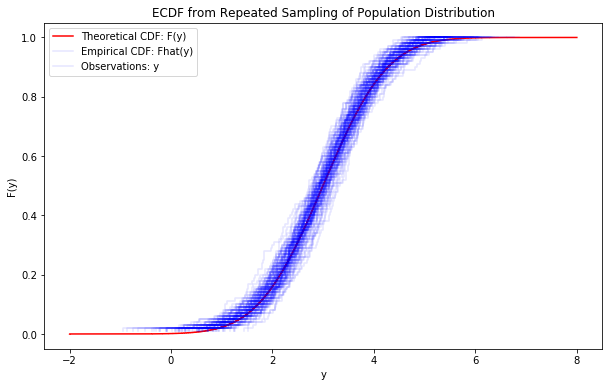

In [14]:
many_independent_ecdfs = [ecdf(Y.rvs(num_data)) for one in range(0, 100)]

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.step(y_grid, Y.cdf(y_grid), '-r')
for one_ecdf in many_independent_ecdfs:
    ax.step(*one_ecdf, '-b', alpha=0.1)

ax.set_title('ECDF from Repeated Sampling of Population Distribution')
ax.set_xlabel('y')
ax.set_ylabel('F(y)')
ax.legend(['Theoretical CDF: F(y)', 'Empirical CDF: Fhat(y)', 'Observations: y'])
plt.show()

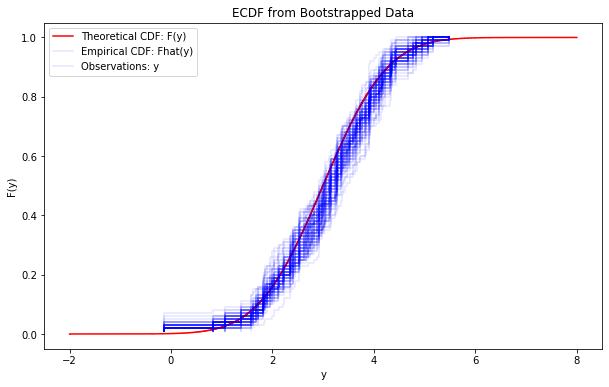

In [15]:
many_resampled_ecdfs = [resample_ecdf(y_data) for one in range(0, 100)]

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.step(y_grid, Y.cdf(y_grid), '-r')
for one_ecdf in many_resampled_ecdfs:
    ax.step(*one_ecdf, '-b', alpha=0.1)

ax.set_title('ECDF from Bootstrapped Data')
ax.set_xlabel('y')
ax.set_ylabel('F(y)')
ax.legend(['Theoretical CDF: F(y)', 'Empirical CDF: Fhat(y)', 'Observations: y'])
plt.show()

- Strange group of age between 0 and 10 years old

# Example: Loaded Dice

In this section, we simulate such situation. There is some loaded dice with pmf as follows:

|Outcome: $x$   |1     |2     |3     |4     |5     |6     |
|------------   |---   |---   |---   |---   |---   |---   |
|$${\Pr(X=x)}$$ |1/12  |2/12  |2/12  |2/12  |2/12  |3/12  |

Function for throwing such dice can be written as follows:

In [1]:
def throw_loaded_dice(n=1):
    
    #np.random()
    from numpy.random import choice
    
    d = [1, 2,2, 3,3, 4,4, 5,5, 6,6,6]
    return(choice(d, n, replace=True))

## Sampling from Population

* `d` represents 12 dice throws, getting one of 1, two of 2, 3 exactly twice, $\dots$, three of 6

* Equivalently, $\Pr(X=x)$:

|Outcome: $x$   |1     |2     |3     |4     |5     |6     |
|------------   |---   |---   |---   |---   |---   |---   |
|$${\Pr(X=x)}$$ |1/12  |2/12  |2/12  |2/12  |2/12  |3/12  |

* Now, 'throw' this dice 1,000 times:

In [2]:
data = throw_loaded_dice(1000)

In [3]:
data[:10]

array([6, 1, 6, 2, 1, 6, 4, 4, 3, 1])

## Resampling from Data

* We may not have the real dice; however, we recorded 1,000 dice throws.

* We can _resample with replacement_ from the data

* Data is our _empirical dice_

In [4]:
def choose_from_data(n=1, data_in=None):
    from numpy.random import choice
    
    return(choice(data_in, n, replace=True))

## Resampling from Data <a class="tocSkip">

Let's resample from `data` with replacement:

In [5]:
pseudo_data = choose_from_data(1000, data)

## Population, Random Sample, vs. Random Resample

In [6]:
pseudo_data[:10]

array([2, 6, 2, 2, 1, 3, 6, 6, 4, 1])

In [20]:
outcome, data_counts = np.unique(data, return_counts=True)
outcome, resample_counts = np.unique(pseudo_data, return_counts=True)

In [21]:
import pandas as pd

pmfs = pd.DataFrame({
    'outcome': np.arange(1, 7),
    'Population': np.array([1, 2, 2, 2, 2, 3])/12,
    'Sample': data_counts/sum(data_counts),
    'Resample': resample_counts/sum(resample_counts),
}, columns=['outcome','Population','Sample','Resample'])

pmfs

,outcome,Population,Sample,Resample
0,1,0.083333,0.091,0.084
1,2,0.166667,0.186,0.185
2,3,0.166667,0.151,0.144
3,4,0.166667,0.179,0.176
4,5,0.166667,0.163,0.176
5,6,0.250000,0.230,0.235


## Quantifying Uncertainty

* One dataset (random sample) is not enough to characterize uncertainty empirically  
    e.g. characterizing variability of polls need many polls (often not possible)

* Characterizing variability/uncertainty can be easily done with resampling:  
    e.g. what is the variability of proportions?


In [22]:
repeat_resampling = []

for one in range(0, 100):
    
    pseudo_data = choose_from_data(1000, data) # resample from `data`
    outcome, resample_counts = np.unique(pseudo_data, return_counts=True) # count occurrences
    
    repeat_resampling += [resample_counts.tolist()]
    
repeat_resampling = np.array(repeat_resampling)/1000
repeat_resampling[:10]

array([[0.084, 0.186, 0.145, 0.192, 0.17 , 0.223],
       [0.081, 0.196, 0.162, 0.169, 0.168, 0.224],
       [0.075, 0.165, 0.161, 0.179, 0.183, 0.237],
       [0.08 , 0.191, 0.165, 0.187, 0.173, 0.204],
       [0.093, 0.193, 0.137, 0.189, 0.173, 0.215],
       [0.098, 0.177, 0.128, 0.187, 0.179, 0.231],
       [0.104, 0.184, 0.16 , 0.171, 0.137, 0.244],
       [0.094, 0.159, 0.168, 0.194, 0.157, 0.228],
       [0.076, 0.18 , 0.161, 0.194, 0.161, 0.228],
       [0.091, 0.169, 0.157, 0.167, 0.171, 0.245]])

In [23]:
uncertainty = np.std(repeat_resampling, 0)
pmfs['Resample-low'] = pmfs['Resample'] - uncertainty
pmfs['Resample-high'] = pmfs['Resample'] + uncertainty
pmfs

,outcome,Population,Sample,Resample,Resample-low,Resample-high
0,1,0.083333,0.091,0.084,0.074948,0.093052
1,2,0.166667,0.186,0.185,0.172137,0.197863
2,3,0.166667,0.151,0.144,0.132795,0.155205
3,4,0.166667,0.179,0.176,0.164288,0.187712
4,5,0.166667,0.163,0.176,0.164623,0.187377
5,6,0.250000,0.230,0.235,0.221699,0.248301


# Resampling Strategies

* Bootstrap is loose term for resampling

* Two commonly used resampling types are,
    * Model-free resampling (non-parametric bootstrap)
    * Model-based resampling (parametric bootstrap)

* **Model-free resampling**:  
    Randomly draw observations from data with replacement

* **Model-based resampling**:
    1. When data is (assumed) from population distribution, $f(y\mid\theta)$,
    2. Estimate $\hat\theta$, and 
    3. Sample from $f(y\mid\hat\theta)$

# The Bootstrap

### Classical/Real sampling

Suppose the sample data $y_1, y_2, \dots, y_B \sim F(y)$. By the law of large numbers, as $B \stackrel{\text{P}}{\longrightarrow} \infty$,

- $\bar{y} = \frac{1}{B} \sum_{i=1}^B y_i \stackrel{\text{P}}{\longrightarrow} \int y p(y) dy = \mathbb{E}(Y)$

- $\frac{1}{B} \sum_{i=1}^B h(y_i) \stackrel{\text{P}}{\longrightarrow} \int h(y) p(y) dy = \mathbb{E}(h(Y))$

- 
$
\frac{1}{B} \sum_{i=1}^B (y_i - \bar{y})^2 = \frac{1}{B}\sum_{i=1}^B y_i^2 - (\frac{1}{B}\sum_{i=1}^B y_i)^2 \stackrel{\text{P}}{\longrightarrow} \int y^2p(y)dy - (\int yp(y)dy)^2 = \text{Var}(Y)
$

### Bootstrap sampling:
- The boostrap is a method for estimating standard errors and computing confidence intervals

- Let $T = g(y_1, y_2, \dots, y_n)$ be a statistic. $\text{Var}_F(T)$ is the variance of $T$

- The distribution function $F(y)$ is unknown

- The idea is to simulate $y^*_1, y^*_2, \dots y^*_n$ from the $\hat{F}$ and then compute $T^* = g(y^*_1, y^*_2, \dots y^*_n)$

$$
\begin{aligned}
\text{Real world}:            F &\implies y_1, \dots y_n      &\implies T = g(y_1, \dots y_n) \\
\text{Bootstrap world}: \hat{F} &\implies y^*_1, \dots y^*_n  &\implies T^* = g(y^*_1, \dots y^*_n)
\end{aligned}
$$

- Note that $\hat{F}$ puts mass $1/n$ at each data point $y_1, \dots, y_n$. Therefore, drawing an observation from $\hat{F}$ is equivalent to drawing one points at random from the original data set

# Bootstrap Estimates of Bias, Standard Deviation, and MSE

|                       | Population    | &nbsp; &nbsp; &nbsp; &nbsp; Sample &nbsp; &nbsp; &nbsp; &nbsp;              | &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Resample &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;                                 |
| :------------------:  | :--------:    | :---------:         |:-----------------------------------:     |
|                       |               |                     | $y^{(1)}_1,y^{(1)}_2,\dots,y^{(1)}_n$    |
| Observations          | $f(y;\theta)$ | $y_1,y_2,\dots,y_n$ | $\vdots$                                 |
|                       |               |                     | $y^{(B)}_1,y^{(B)}_2,\dots,y^{(B)}_n$    |
| Parameter of Interest | $\theta$      | $\hat\theta$        | $\hat\theta^{(1)},\dots,\hat\theta^{(B)}$|


## Bootstrap Bias Estimate

Bias of estimator $\hat\theta$ for $\theta$:
$$\text{BIAS}(\hat\theta) = \text{E}[{\hat{\theta}}] - \theta$$
Since $\theta$ and $\overline{\hat\theta}$ are unknown, calculate instead:
$$\text{BIAS}_{\mathrm{boot}}(\hat\theta) = \overline{\hat{\theta}^*} - \hat\theta,$$
where $\overline{\hat{\theta}^*} = \frac{1}{B}\sum_{b=1}^B\hat\theta^{(b)}$

## Bootstrap Standard Error
Under classical setup, Variance of $\hat\theta$ / square of standard error are:
$$\text{Var}(\hat{\theta})=\text{E}\left(\hat{\theta}-\text{E}[\hat{\theta}]\right)^{2}$$
Under bootstrap, estimated variance / squared standard deviation (standard error) for $\hat\theta$ is
$$s_{\mathrm{boot}}^2(\hat{\theta})=\frac{1}{B-1} \sum_{b=1}^{B}\left(\hat{\theta}^{(b)}-\overline{\hat{\theta}^{*}}\right)^{2}$$

## Bootstrap Mean Square Error

Definition of MSE:
$$\operatorname{MSE}(\hat{\theta})=\operatorname{E}(\hat\theta - \theta)^2 = \text{BIAS}^2(\hat\theta) + \text{Var}(\hat{\theta})$$
Since $\theta$ is unknown, calculate,
$$\operatorname{MSE}_{\text {boot }}(\hat{\theta})= \text{BIAS}^2_{\mathrm{boot}}(\hat\theta) + s^2_{\mathrm{boot}}(\hat{\theta})$$

## Bootstrap Confidence Interval 

- Normal-based confidence interval, suppose $\hat{\theta} \approx N(\theta, \; \widehat{\text{se}})$,

$$ C = (\hat{\theta} - z_{\alpha/2}\widehat\text{se}, \; \hat{\theta} + z_{\alpha/2}\widehat\text{se}) $$

- Bootstrap confidence interval

    
    1. The normal interval
    
$$ C = (\hat{\theta} - z_{\alpha/2}\widehat\text{s}_\text{boot}, \; \hat{\theta} + z_{\alpha/2}\widehat\text{s}_\text{boot}) $$
   
    
    2. Percentile intervals
    
    3. Pivotal intervals


### 2. Percentile intervals

Suppose we draw B bootstrap samples of size n. For each sample it calculates the bootstrap sample mean.

Rank the bootstrap means from smallest to largest. We denote these ordered bootstrap estimates by:

$\hat\theta^*_{(1)},\dots,\hat\theta^*_{(B)}$

The bootstrap percentile interval is defined by 

$$C = (\hat\theta^*_{\alpha/2}, \; \hat\theta^*_{1 - \alpha/2}) $$

For example, $95\%$ percentile confidence interval is $(\hat\theta^*_{0.025}, \; \hat\theta^*_{0.975}) $

### 3. Pivotal intervals

Define the **pivot** $\hat{\theta} - \theta$, the pivot confidence interval argues that the behavior of $\hat{\theta} - \theta$ is approximately the same as the behavior of $\hat{\theta} - \hat{\theta}^*$,

$\alpha = 0.05$

$$
\begin{aligned}
 0.95 &\approx \text{Pr}(\hat{\theta}^*_{\alpha/2} \leq \hat{\theta}^* \leq \hat\theta^*_{ 1- \alpha/2} ) \\
 &= \text{Pr}(\hat{\theta}^*_{\alpha/2} - \hat{\theta} \leq \hat{\theta}^* - \hat{\theta} \leq \hat\theta^*_{ 1- \alpha/2}- \hat{\theta} ) \\
 &= \text{Pr}(\hat{\theta} - \hat{\theta}^*_{\alpha/2} \geq \hat{\theta} - \hat{\theta}^* \geq \hat{\theta} - \hat\theta^*_{ 1- \alpha/2} ) \\
 &\approx \text{Pr}(\hat{\theta} - \hat{\theta}^*_{\alpha/2} \geq {\theta} - \hat{\theta} \geq \hat{\theta} - \hat\theta^*_{ 1- \alpha/2} )\\
 &=  \text{Pr}(2\hat{\theta} - \hat{\theta}^*_{\alpha/2} \geq {\theta} \geq 2\hat{\theta} - \hat\theta^*_{ 1- \alpha/2} )
\end{aligned}
$$

So, $$C = (2\hat{\theta} - \hat\theta^*_{ 1- \alpha/2}, \;  2\hat{\theta} - \hat{\theta}^*_{\alpha/2})$$
